In [1]:
import os
from scipy.io import wavfile
from IPython.display import Audio
from librosa.core import stft, resample
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [3]:
pod_path = '/home/seth/datasets/open-unmix/data/train/podcasts'
inter_path = '/home/seth/datasets/open-unmix/ESC-50/audio'

In [4]:
pod_sample = 'andrew_yang_336.wav'
inter_sample = '1-19898-B-41.wav'

In [5]:
sr, pod_audio = wavfile.read(os.path.join(pod_path, pod_sample))
pod_audio = resample(np.float32(pod_audio), sr, 16000)[:32000]
display(Audio(pod_audio, rate=16000))

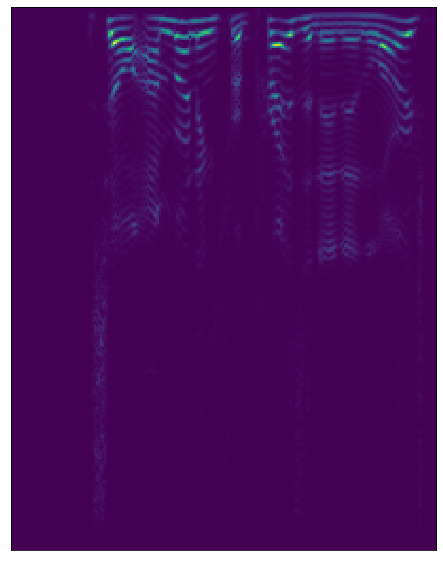

In [6]:
X_pod = np.abs(stft(pod_audio, n_fft=512, hop_length=160))
plt.imshow(X_pod)
plt.yticks([])
plt.xticks([])
plt.show()

In [7]:
sr, inter_audio = wavfile.read(os.path.join(inter_path, inter_sample))
inter_audio = resample(np.float32(inter_audio), sr, 16000)[32000:64000]
display(Audio(inter_audio, rate=16000))

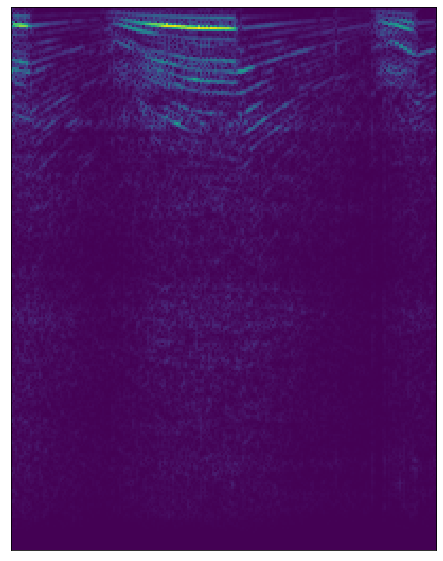

In [8]:
X_inter = np.abs(stft(inter_audio, n_fft=512, hop_length=160))
plt.imshow(X_inter)
plt.yticks([])
plt.xticks([])
plt.show()

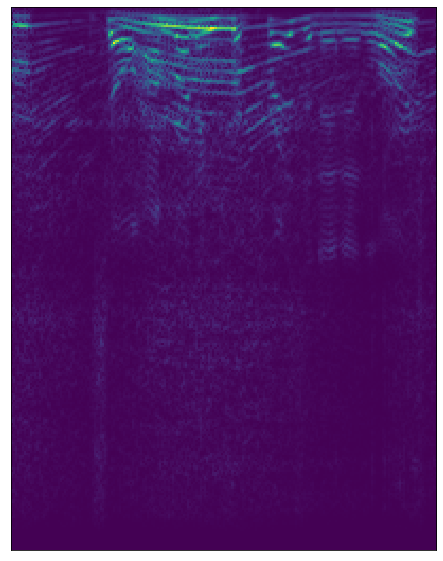

In [9]:
plt.imshow(X_pod+X_inter)
plt.yticks([])
plt.xticks([])
plt.show()

In [10]:
eps = np.finfo(np.float32).eps

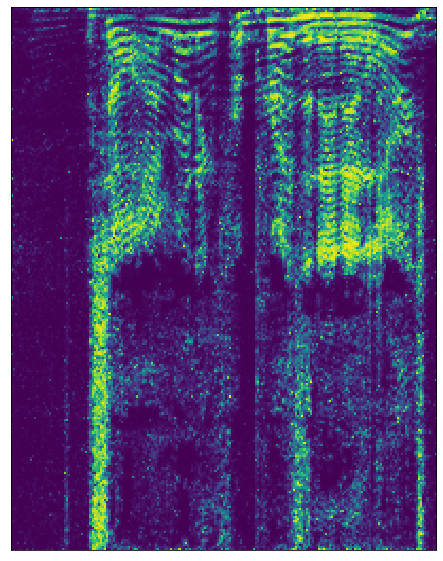

In [11]:
rm_pod = (X_pod+eps) / (X_pod+X_inter+eps)
plt.imshow(rm_pod)
plt.yticks([])
plt.xticks([])
plt.show()

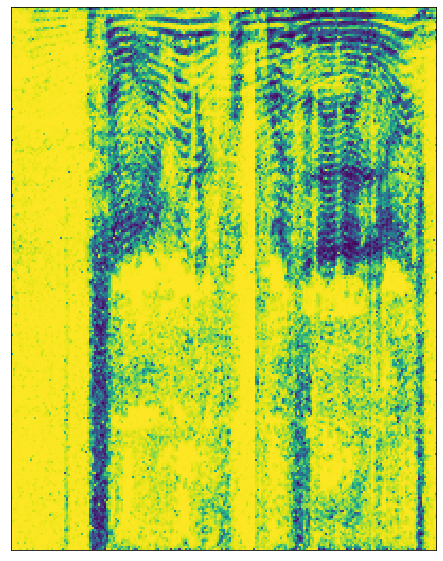

In [12]:
rm_inter = (X_inter+eps) / (X_pod+X_inter+eps)
plt.imshow(rm_inter)
plt.yticks([])
plt.xticks([])
plt.show()